In [3]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


In [5]:
pokemon.shape

(742, 13)

In [6]:
pokemon.describe().round(2)

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,742.00,742.00,742.00,742.00,742.00,742.00,742.00,742.00,742.00
mean,371.50,422.71,68.70,75.80,71.44,70.11,70.09,66.57,3.36
std,214.34,111.90,25.98,29.66,29.47,29.98,27.31,27.90,1.66
min,1.00,180.00,1.00,5.00,5.00,10.00,20.00,5.00,1.00
25%,186.25,325.00,50.00,55.00,50.00,45.25,50.00,45.00,2.00
50%,371.50,430.00,65.00,75.00,67.00,65.00,65.00,65.00,3.00
75%,556.75,500.00,80.00,95.00,89.75,90.00,85.00,86.75,5.00
max,742.00,720.00,255.00,180.00,230.00,180.00,230.00,180.00,6.00


#Cleaning the data:

In [7]:
pokemon.isna().sum()

#               0
Name            0
Type 1          0
Type 2        374
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [8]:
pokemon.dropna(inplace=True)

In [9]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
5,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
11,12,Butterfree,Bug,Flying,395,60,45,50,90,80,70,1,False


In [10]:
pokemon.isna().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

#Each pokemon type:

In [35]:
pokemon.value_counts('Type 2')

Type 2
Flying      91
Poison      31
Ground      31
Psychic     28
Fighting    21
Steel       20
Grass       19
Fairy       18
Dark        17
Dragon      15
Rock        14
Water       14
Ice         13
Ghost       13
Fire        10
Electric     6
Normal       4
Bug          3
Name: count, dtype: int64

#Each pokemon type graphic:

Text(0.5, 1.0, 'Pokemon Type')

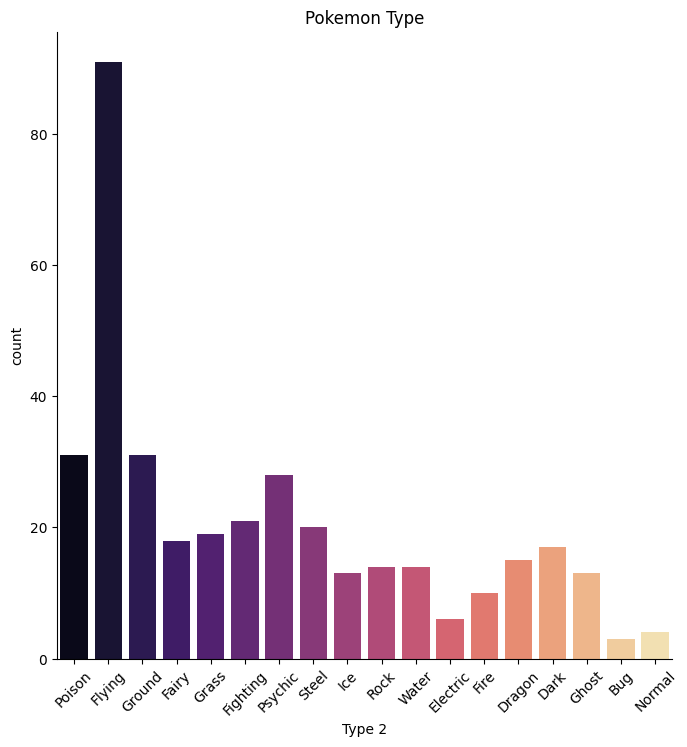

In [36]:
sns.catplot(x='Type 2', kind='count', hue='Type 2', palette='magma', data=pokemon, height=7)

plt.xticks(rotation=45)
plt.title('Pokemon Type')

#Each Pokemon type Average attacks:

In [13]:
data = pokemon.groupby('Type 2').agg({'Attack':pd.Series.mean})
data

,Attack
Type 2,
Bug,90.000000
Dark,102.176471
Dragon,91.000000
Electric,72.666667
Fairy,49.833333
Fighting,99.904762
Fire,70.500000
Flying,76.802198
Ghost,84.076923


In [14]:
data.index

Index(['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
       'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water'],
      dtype='object', name='Type 2')

In [15]:
data.values

array([[ 90.        ],
       [102.17647059],
       [ 91.        ],
       [ 72.66666667],
       [ 49.83333333],
       [ 99.9047619 ],
       [ 70.5       ],
       [ 76.8021978 ],
       [ 84.07692308],
       [ 72.42105263],
       [ 83.22580645],
       [ 95.38461538],
       [ 52.75      ],
       [ 63.96774194],
       [ 68.39285714],
       [ 84.        ],
       [ 87.1       ],
       [ 70.14285714]])

#Each pokemon type average attack graphic:

In [37]:
fig = px.pie(labels=data.index, values=data.values.reshape(-1), names=data.index, title='Pokemon Type average attack', height=600)

fig.update_traces(textposition='outside', textinfo='percent+label', textfont_size=12)

fig.show()

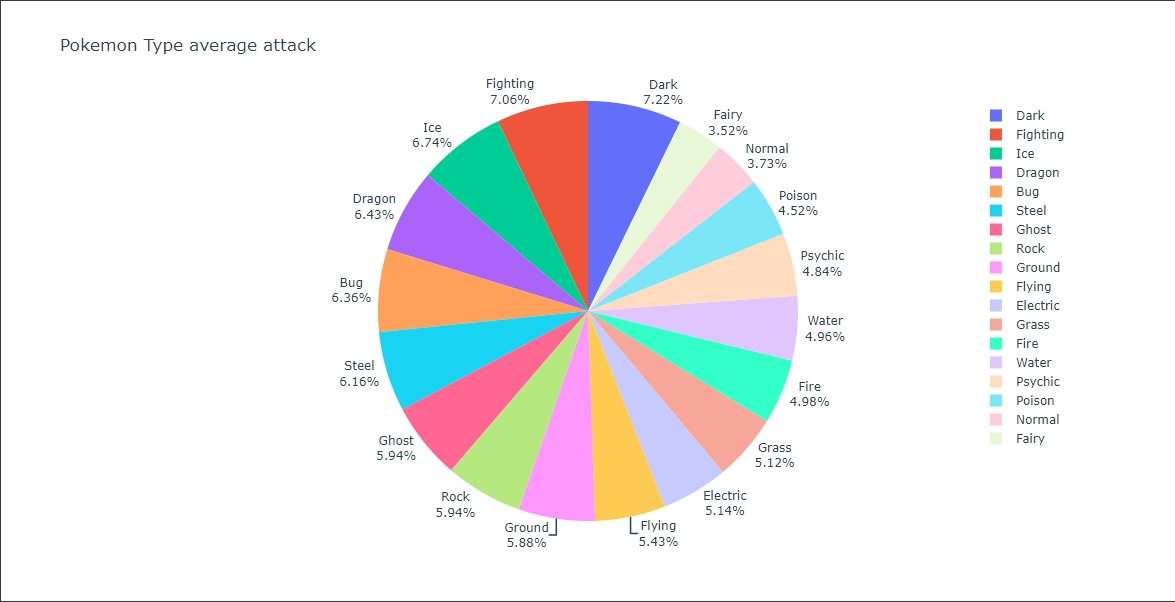

#List of all legendaries pokemons:

In [ ]:
pokemon[pokemon['Legendary'] == True]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
142,143,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
143,144,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
144,145,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
247,248,Lugia,Psychic,Flying,680,106,90,130,90,154,110,2,True
248,249,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
378,379,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
379,380,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
382,383,Rayquaza,Dragon,Flying,680,105,150,90,150,90,95,3,True
383,384,Jirachi,Steel,Psychic,600,100,100,100,100,100,100,3,True
491,492,Dialga,Steel,Dragon,680,100,120,120,150,100,90,4,True


#Legendary pokemon attack graphic:

In [81]:
leg = pokemon[pokemon['Legendary'] == True]

f = px.bar(x = leg.Attack, y = leg.Name, orientation='h', title='Legendary Pokemons Attacks')

f.update_layout(xaxis_title='Pokemon Names', yaxis_title='Attack Values', yaxis={"dtick":1}, margin={"t":100,"b":100}, height=900)

f.show()

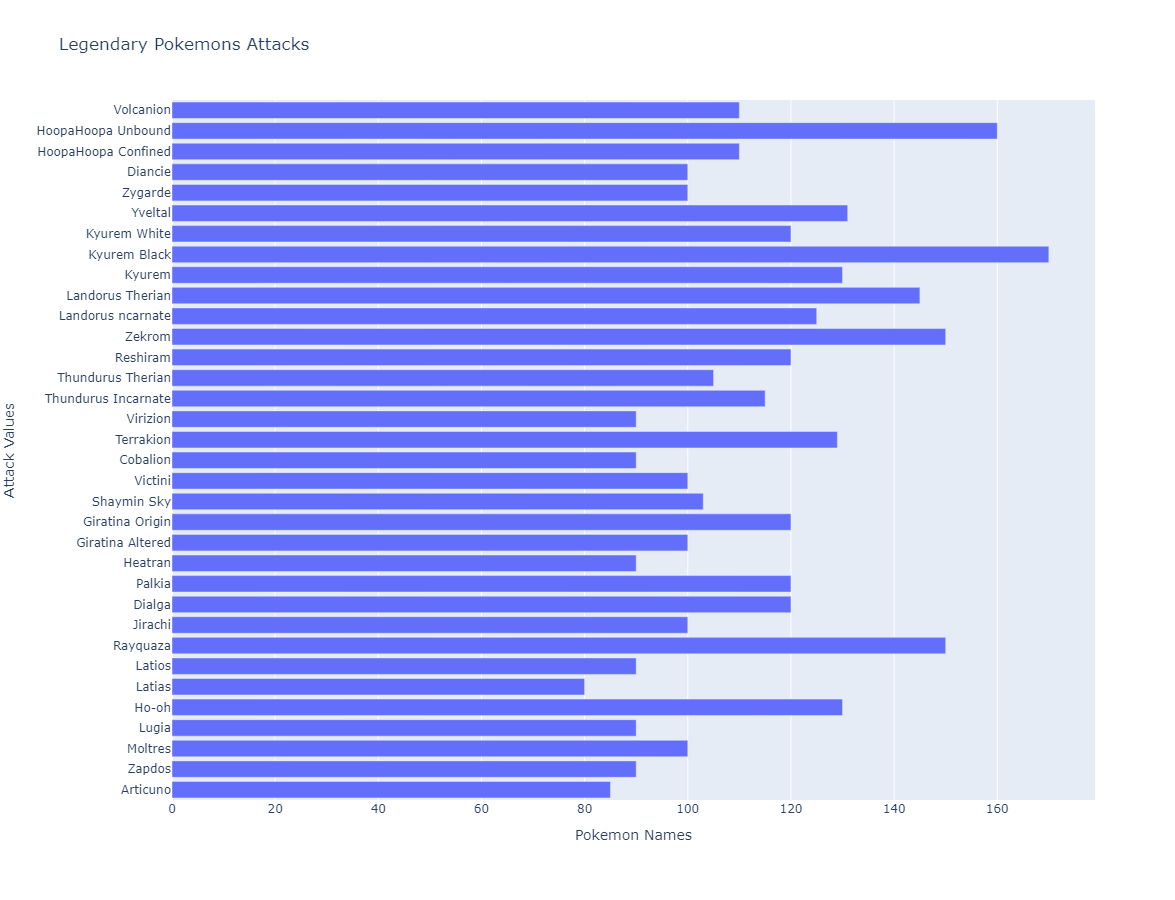

#Strongest legendary pokemon attack:

In [46]:
leg['Attack'].max()

170

In [47]:
leg['Attack'].idxmax()

661

In [48]:
leg.loc[661]

#                      662
Name          Kyurem Black
Type 1              Dragon
Type 2                 Ice
Total                  700
HP                     125
Attack                 170
Defense                100
Sp. Atk                120
Sp. Def                 90
Speed                   95
Generation               5
Legendary             True
Name: 661, dtype: object


Result: The strongest legendary pokemon attack is Kyurem Black

#Weakest legendary pokemon attack:

In [49]:
leg['Attack'].min()

80

In [50]:
leg['Attack'].idxmin()

378

In [51]:
leg.loc[378]

#                 379
Name           Latias
Type 1         Dragon
Type 2        Psychic
Total             600
HP                 80
Attack             80
Defense            90
Sp. Atk           110
Sp. Def           130
Speed             110
Generation          3
Legendary        True
Name: 378, dtype: object